In [8]:
import pandas, numpy as np, os
import scipy
from scipy import stats
import rpy2.robjects.lib.ggplot2 as ggplot2
%load_ext rpy2.ipython
import config

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
languages = ['eng', 'spa', 'deu', 'rus', 'heb', 'fra','ces','swe', 'pol', 'ron','ita','por','nld'] 
# note that this is all of the languages in OPUS

# Load IDS lists

In [12]:
allcodes = pandas.read_table(os.path.join(config.paths['IDS'],'allcodes.txt'), header=None, sep=' ',names=['id','gc', 'iso'])
languagesOfInterest = allcodes[allcodes['iso'].isin(languages)]
languagesOfInterest

,id,gc,iso
21,170,ital1282,ita
22,171,stan1290,fra
27,176,stan1288,spa
29,178,port1283,por
30,179,roma1327,ron
38,187,swed1254,swe
41,190,stan1293,eng
42,191,dutc1256,nld
45,194,stan1295,deu
53,202,czec1258,ces


In [13]:
set(languages) - set(allcodes['iso'].tolist())

{'heb'}

In [14]:
def readTable(id):
    df = pandas.read_table(os.path.join(config.paths['IDS'],'ids', str(id)+'.txt'), encoding='utf-8', sep='\t')
    # eliminate trailing spaces in the IDS dataset
    df['Name'] = [x.strip() for x in df.Name]
    df['Parameter'] = [x.strip() for x in df.Parameter]
    df['Language'] = [x.strip() for x in df.Language]
    return(df)
    
ids_selected = pandas.concat([readTable(id) for id in languagesOfInterest['id']])

In [15]:
ids_selected.iloc[6000:6100].Name.tolist()

[u'dentro',
 u'fora',
 u'debaixo',
 u'em cima',
 u'so\u0302bre',
 u'espac\u0327o',
 u'lugar',
 u'po\u0302r',
 u'sentar-se',
 u'deitar-se',
 u'estar em pe\u0301',
 u'ficar em pe\u0301',
 u'ficar',
 u'restos',
 u'colecionar',
 u'reunir',
 u'captar',
 u'empilhar',
 u'juntar',
 u'unir',
 u'separar',
 u'dividir',
 u'abrir',
 u'aberto',
 u'fechar',
 u'cobrir',
 u'esconder',
 u'alto',
 u'elevado',
 u'baixo',
 u'cume',
 u'topo',
 u'fundo',
 u'extremidade',
 u'fim',
 u'ponta',
 u'afiado',
 u'agudo',
 u'beira',
 u'borda',
 u'lado',
 u'meio',
 u'centro',
 u'direita',
 u'esquerda',
 u'perto',
 u'pro\u0301ximo',
 u'longe',
 u'leste',
 u'este',
 u'oeste',
 u'norte',
 u'sul',
 u'crescer',
 u'medir',
 u'palmo',
 u'brac\u0327a',
 u'grande',
 u'pequeno',
 u'comprido',
 u'alto',
 u'curto',
 u'largo',
 u'estreito',
 u'grosso',
 u'fino',
 u'delgado',
 u'fundo',
 u'raso',
 u'baixo',
 u'plano',
 u'chato',
 u'direito',
 u'reto',
 u'torcido',
 u'torto',
 u'gancho',
 u'esquina',
 u'canto',
 u'cruz',
 u'quadrado

Only Hebrew is missing

In [16]:
ids_selected['concept'] = ['-'.join(x.split('-')[0:2]) for x in ids_selected['ID']]
ids_selected['concept_word'] = ids_selected['concept'].map(str)+ids_selected['Name']
ids_selected.shape

(20510, 9)

In [18]:
# Example table
ids_selected.loc[ids_selected.Language == 'French']

,ID,Name,Parameter,Language,Frequency,Confidence,References,concept,concept_word
0,1-100-171-1,monde,world,French,NaN,NaN,NaN,1-100,1-100monde
1,1-210-171-1,terre,"earth, land",French,NaN,NaN,NaN,1-210,1-210terre
2,1-212-171-1,terre,"earth=ground, soil",French,NaN,NaN,NaN,1-212,1-212terre
3,1-212-171-3,sol,"earth=ground, soil",French,NaN,NaN,NaN,1-212,1-212sol
4,1-213-171-1,poussière,dust,French,NaN,NaN,NaN,1-213,1-213poussière
5,1-214-171-1,boue,mud,French,NaN,NaN,NaN,1-214,1-214boue
6,1-215-171-1,sable,sand,French,NaN,NaN,NaN,1-215,1-215sable
7,1-220-171-1,montagne,"mountain, hill",French,NaN,NaN,NaN,1-220,1-220montagne
8,1-220-171-3,colline,"mountain, hill",French,NaN,NaN,NaN,1-220,1-220colline
9,1-222-171-1,falaise,"cliff, precipice",French,NaN,NaN,NaN,1-222,1-222falaise


In [22]:
print(len(np.unique(ids_selected['concept'])))

1310


In [20]:
ids_selected.iloc[0]

ID              1-100-170-1
Name                  mondo
Parameter             world
Language            Italian
Frequency               NaN
Confidence              NaN
References              NaN
concept               1-100
concept_word     1-100mondo
Name: 0, dtype: object

In [23]:
concept_counts = ids_selected.groupby('concept').Language.nunique().reset_index()
concepts_with_sufficient_coverage = concept_counts.loc[concept_counts.Language >= 9].concept

In [24]:
ids_selected.loc[ids_selected.concept == concepts_with_sufficient_coverage[0]][['Name','Language']]

,Name,Language
0,mondo,Italian
0,monde,French
0,mundo,Spanish
0,mundo,Portuguese
0,lume,Romanian
0,verld,Swedish
1,värld,Swedish
0,world,English
0,wereld,Dutch
0,Welt,German


In [25]:
ids_with_coverage = ids_selected.loc[ids_selected.concept.isin(concepts_with_sufficient_coverage)]
concepts_per_language = ids_with_coverage.groupby('Language').concept.nunique().reset_index()
concepts_per_language.sort_values(by='concept')

,Language,concept
8,Romanian,918
11,Swedish,1241
6,Polish,1286
0,Czech,1304
9,Russian,1305
4,German,1309
1,Dutch,1310
2,English,1310
3,French,1310
5,Italian,1310


Coverage is generally decent, with the exceptions of Romanian. Note that this is just the number of items in the concept dictionary; the actual number of matches depends on the match of the orthography used in the Google dataset and whatever is used in the IDS data. 

# Issues with IDS Orthographic Representations

Good news is that it is encoded in UTF-8 but there is some dataset-specific variation  
[ ] 'n~' encoded peculiarly in Spanish.   
[ ] Russian isn't really in Cyrillic (nor a clear latinate transcription)  
[ ] Russian forms have apostrophe-like character in them. See https://en.wikipedia.org/wiki/Romanization_of_Russian  

In [26]:
print(ids_selected[ids_selected['Language'] == 'Spanish']['Name'].iloc[6])

montaɲa


In [27]:
print(' '.join(ids_selected[ids_selected['Language'] == 'Russian'].iloc[1:100].Name))

svet zemlja počva pyl grjaz pesok gora cholm xolm skala ravnina pole dolina ostrov materik bereg poberež ́je pečera voda more zatiš ́je burnoe more pena okean ozero zaliv laguna rif mys volna (val) morskoj priliv i otliv nizšaja točka otliva vysšaja točka priliva reka potok ručej vodovorot ključ rodnik istočnik kolodec boloto vodopad les derevo derevo kamen zemle trjasenie nebo solnce luna (mesjac) zvezda molnija grom molnija burja raduga svet temnota t ́ma mrak ten ́ rosa vozdux veter oblako tuča tuman mgla dožd sneg led pogoda ogon plamja dym pepel poslednie krasnye ugol ́ki žeč goret zažeč tušit ́ gasit spička drova drevesnyj ugal čelovek mužčina ženščina mužskoj ženskij mal ́čik junoša podrostok devočka devuška rebenok (deti) mladenec muž


# Lexical Suprisal vs. Sublexical Surprisal

In [36]:
import ids_analysis
reload(ids_analysis)

<module 'ids_analysis' from 'ids_analysis.pyc'>

In [30]:
ids_selected['clean_word'] = [ids_analysis.clean_word(x) for x in ids_selected['Name']]
ids_clean = ids_selected[~ids_selected['clean_word'].isnull()]
ids_clean['word'] = ids_clean['clean_word']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
ids_clean.loc[ids_clean.Language == 'French'].Name.tolist()

[u'monde',
 u'terre',
 u'terre',
 u'sol',
 u'poussie\u0300re',
 u'boue',
 u'sable',
 u'montagne',
 u'colline',
 u'falaise',
 u'escarpement',
 u'plaine',
 u'campagne',
 u'valle\u0301e',
 u'i\u0302le',
 u'continent',
 u'rivage',
 u'co\u0302te',
 u'littoral',
 u'grotte',
 u'eau',
 u'mer',
 u'e\u0301tale',
 u'trouble',
 u'agite\u0301',
 u'e\u0301cume',
 u'mousse',
 u'oce\u0301an',
 u'lac',
 u'golfe',
 u'baie',
 u'lagune',
 u're\u0301cif',
 u'promontoire',
 u'pointe',
 u'vague',
 u'mare\u0301e',
 u'fleuve',
 u'rivie\u0300re',
 u'ruisseau',
 u'tourbillon',
 u'source',
 u'puits',
 u'marais',
 u'mare\u0301cage',
 u'cascade',
 u'bois',
 u'fore\u0302t',
 u'arbre',
 u'bois',
 u'pierre',
 u'roc',
 u'rocher',
 u'se\u0301isme',
 u'ciel',
 u'soleil',
 u'lune',
 u'e\u0301toile',
 u'e\u0301clair',
 u'tonnerre',
 u'foudre',
 u'orage',
 u'tempe\u0302te',
 u'arc-en-ciel',
 u'lumie\u0300re',
 u'obscurite\u0301',
 u'te\u0301ne\u0300bres',
 u'ombre',
 u'rose\u0301e',
 u'air',
 u'vent',
 u'nuage',
 u'brume',


In [32]:
wordlist = {}
conceptlist = {}
for language in languages:
    df = ids_clean[ids_clean.Language == ids_analysis.ids_to_language[language]]
    conceptlist[language] = df
    wordlist[language] = df.Name.tolist()

In [41]:
ids_clean.loc[ids_clean.Language == 'French'].iloc[0:10].word.tolist()

[u'monde',
 u'terre',
 u'terre',
 u'sol',
 u'poussie\u0300re',
 u'boue',
 u'sable',
 u'montagne',
 u'colline',
 u'falaise']

In [42]:
reload(ids_analysis)
reload(config)
wordDF = ids_analysis.retrieveMeasuresForIDSitems(config.paths['MG_Google1T'], wordlist, conceptlist, languages)

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:2242: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [43]:
#how many concepts are represented in each language after the join?
concepts_per_language_in_analysis = wordDF.groupby('Language').concept.nunique().reset_index()
concepts_per_language_in_analysis.columns = ['Language', 'concepts_after_join']
concepts_per_language_in_analysis = concepts_per_language_in_analysis.merge(concepts_per_language)
concepts_per_language_in_analysis['hit_rate'] = concepts_per_language_in_analysis['concepts_after_join'] / concepts_per_language_in_analysis['concept']
concepts_per_language_in_analysis.sort_values(by='hit_rate')

,Language,concepts_after_join,concept,hit_rate
0,Czech,883,1304,0.677147
9,Russian,981,1305,0.751724
8,Romanian,729,918,0.794118
6,Polish,1051,1286,0.817263
11,Swedish,1048,1241,0.844480
3,French,1177,1310,0.898473
10,Spanish,1177,1310,0.898473
2,English,1193,1310,0.910687
5,Italian,1193,1310,0.910687
7,Portuguese,1206,1310,0.920611


In [44]:
example_french = ids_clean[ids_clean['Language'] == 'French'].copy()
example_french['in_intersection'] = example_french['Name'].isin(wordDF.loc[wordDF.Language == 'French'].Name)
example_french.loc[~example_french.in_intersection]

,ID,Name,Parameter,Language,Frequency,Confidence,References,concept,concept_word,clean_word,word,in_intersection
67,1-590-171-1,arc-en-ciel,rainbow,French,NaN,NaN,NaN,1-590,1-590arc-en-ciel,arcenciel,arcenciel,False
136,2-460-171-1,grand-père,grandfather,French,NaN,NaN,NaN,2-460,2-460grand-père,grandpère,grandpère,False
138,2-470-171-1,grand-mère,grandmother,French,NaN,NaN,NaN,2-470,2-470grand-mère,grandmère,grandmère,False
140,2-480-171-1,petit-fils,grandson,French,NaN,NaN,NaN,2-480,2-480petit-fils,petitfils,petitfils,False
141,2-490-171-1,petite-fille,granddaughter,French,NaN,NaN,NaN,2-490,2-490petite-fille,petitefille,petitefille,False
154,2-610-171-1,beau-père,father-in-law (of a man),French,NaN,NaN,NaN,2-610,2-610beau-père,beaupère,beaupère,False
155,2-611-171-1,beau-père,father-in-law (of a woman),French,NaN,NaN,NaN,2-611,2-611beau-père,beaupère,beaupère,False
156,2-620-171-1,belle-mère,mother-in-law (of a man),French,NaN,NaN,NaN,2-620,2-620belle-mère,bellemère,bellemère,False
157,2-621-171-1,belle-mère,mother-in-law (of a woman),French,NaN,NaN,NaN,2-621,2-621belle-mère,bellemère,bellemère,False
161,2-640-171-3,belle-fille,daughter-in-law (of a man),French,NaN,NaN,NaN,2-640,2-640belle-fille,bellefille,bellefille,False


In [46]:
example_czech = ids_clean[ids_clean['Language'] == 'Czech'].copy()
example_czech['in_intersection'] = example_czech['Name'].isin(wordDF.loc[wordDF.Language == 'Czech'].Name)      

In [47]:
print(' '.join(example_czech.loc[~example_czech.in_intersection].Name))

pahorek sráz rovina dolina pevnina bezvětří úskalí zřídlo déšt’ hořeti páliti žhnouti zapáliti uhasiti zničiti sirka zápalka dět’átko chot’ chot’ ženitba vdavky sourozenec kmet ujec ujec bratrovec sestřenec bratrovna zet’ zet’ pastorek pastorkyně sirota živočich pásti pastucha chlév bahnice sele kůzle mul luňák šupina žábra ulita lastura rejnok hnida stonožka škorpion moskyt světluška hlemýžd’ kajman lupa ohon chvost leb líce obrv mrkati chřípí hlen pysk šíje týl plece lýtko šlépěj hrud’ ňadro vemeno výmě moudí pyj dýchati zívati škytati kašlati kýchati plivati dáviti zvraceti blíti kousati hryzati lízati kapati spátí chrápati sníti probuditi bdíti prděti bzdíti močiti souložiti jebati zploditi roditi březí počíti žíti umříti utopený zabíti usmrtiti pochovati pohřbíti nastuzení katar podlitina pohmožděnina svrab vřídek hojiti léčiti mdlý lenivý lysý kulhavý jísti nezralý píti sáti žvýkati 

In [48]:
example_english = ids_clean[ids_clean['Language'] == 'English'].copy()
example_english['in_intersection'] = example_english['Name'].isin(wordDF.loc[wordDF.Language == 'English'].Name)      
example_english.loc[~example_english.in_intersection]

,ID,Name,Parameter,Language,Frequency,Confidence,References,concept,concept_word,clean_word,word,in_intersection
34,1-353-190-1,lowtide,lowtide,English,NaN,NaN,NaN,1-353,1-353lowtide,lowtide,lowtide,False
35,1-354-190-1,hightide,hightide,English,NaN,NaN,NaN,1-354,1-354hightide,hightide,hightide,False
139,2-610-190-1,father-in-law,father-in-law (of a man),English,NaN,NaN,NaN,2-610,2-610father-in-law,fatherinlaw,fatherinlaw,False
140,2-611-190-1,father-in-law,father-in-law (of a woman),English,NaN,NaN,NaN,2-611,2-611father-in-law,fatherinlaw,fatherinlaw,False
141,2-620-190-1,mother-in-law,mother-in-law (of a man),English,NaN,NaN,NaN,2-620,2-620mother-in-law,motherinlaw,motherinlaw,False
142,2-621-190-1,mother-in-law,mother-in-law (of a woman),English,NaN,NaN,NaN,2-621,2-621mother-in-law,motherinlaw,motherinlaw,False
143,2-630-190-1,son-in-law,son-in-law (of a man),English,NaN,NaN,NaN,2-630,2-630son-in-law,soninlaw,soninlaw,False
144,2-631-190-1,son-in-law,son-in-law (of a woman),English,NaN,NaN,NaN,2-631,2-631son-in-law,soninlaw,soninlaw,False
145,2-640-190-1,daughter-in-law,daughter-in-law (of a man),English,NaN,NaN,NaN,2-640,2-640daughter-in-law,daughterinlaw,daughterinlaw,False
146,2-641-190-1,daughter-in-law,daughter-in-law (of a woman),English,NaN,NaN,NaN,2-641,2-641daughter-in-law,daughterinlaw,daughterinlaw,False


- Spot checked some translations with Google Translator
- The target words are not in my counts from OPUS, so anything filtered with OPUS is going to lack counts
- Does steve's data have nonzero counts for these items? Yes, for some but not all of the items. Some of these may have been filtered spuriously by limiting to forms that Aspell recognizes as words
- Note that in looking at the English dataset we can see that a large number of items are not present, because some of the items are expressed in terms of multiple words (day-after-tomorrow), are capitalized (days of the week), or include punctuation (how?, what?). So the appropriate number is not all
- For some of these, they are not present in the unigram counts for the relevant language, e.g. Czech `písek`

In [49]:
%R -i wordDF

In [166]:
#example_czech[['concept','Parameter']]

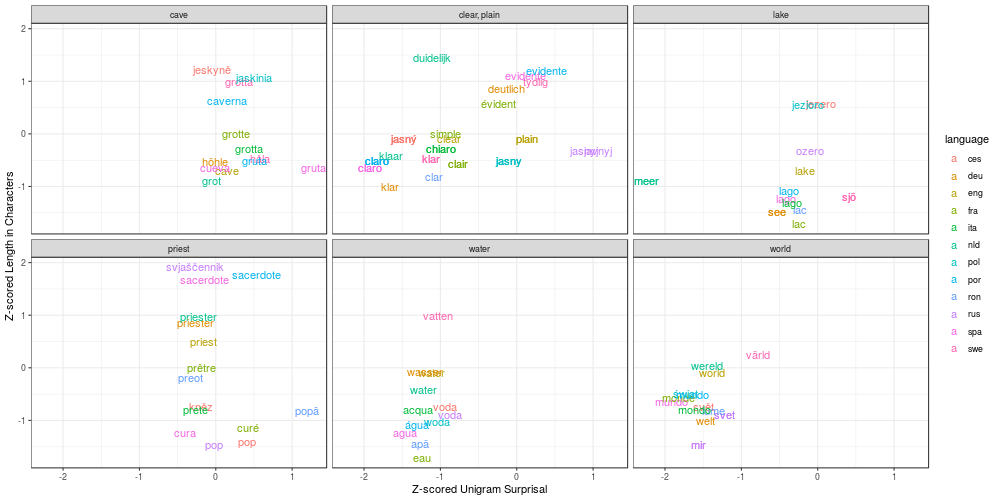

In [50]:
%%R -w 1000 -h 500
ggplot(data=subset(wordDF, concept %in% c('1-100', '22-180', '1-330', '17-340', '1-310', '1-280')
)) + geom_text(aes(x=unigramSurprisal_z, y=character_n_z, colour=language, label=word)) + theme_bw(
) + facet_wrap(~Parameter) + xlab('Z-scored Unigram Surprisal') + ylab('Z-scored Length in Characters')

# Fixed Effects Regression Models

In [51]:
%%R
lm1 = lm(ipa_n_z ~ mean_surprisal_weighted_z + language + concept, data=wordDF)
lm1_sum = summary(lm1)
print(paste('nchar ~ mean trigram surprial:', lm1_sum$r.squared))

[1] "nchar ~ mean trigram surprial: 0.402789013344768"


In [52]:
%%R
lm2 = lm(ipa_ss_z ~ mean_surprisal_weighted_z + language + concept, data=wordDF)
lm2_sum = summary(lm2)
print(paste('ss ~ mean trigram surprial:', lm2_sum$r.squared))

[1] "ss ~ mean trigram surprial: 0.340962283230143"


In [53]:
%%R
lm3 = lm(ipa_n_z ~ unigramSurprisal_z + language + concept, data=wordDF)
lm3_sum = summary(lm3)
print(paste('nchar ~ unigram surprial:', lm3_sum$r.squared))

[1] "nchar ~ unigram surprial: 0.435712354587878"


In [54]:
%%R
lm4 = lm(ipa_ss_z ~ unigramSurprisal_z + language + concept, data=wordDF)
lm4_sum = summary(lm4)
print(paste('ss ~ unigram surprial:', lm4_sum$r.squared))

[1] "ss ~ unigram surprial: 0.410151930131908"


# Mixed effects Regression Models

In [55]:
%%R
library('lme4')
mlm1 = lmer(ipa_n_z ~ mean_surprisal_weighted_z + (1|language) + (1|concept), data=wordDF, REML=F)
mlm1_sum = summary(mlm1)
mlm1_sum

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: ipa_n_z ~ mean_surprisal_weighted_z + (1 | language) + (1 | concept)
   Data: wordDF

     AIC      BIC   logLik deviance df.resid 
 47475.5  47514.7 -23732.8  47465.5    18745 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4221 -0.6406 -0.0895  0.5621  7.1301 

Random effects:
 Groups   Name        Variance  Std.Dev.
 concept  (Intercept) 0.2844278 0.53332 
 language (Intercept) 0.0002491 0.01578 
 Residual             0.6432912 0.80205 
Number of obs: 18750, groups:  concept, 1303; language, 12

Fixed effects:
                          Estimate Std. Error t value
(Intercept)               0.019499   0.016732   1.165
mean_surprisal_weighted_z 0.238170   0.007653  31.122

Correlation of Fixed Effects:
            (Intr)
mn_srprsl__ -0.020


In [56]:
%%R
mlm2 = lmer(ipa_n_z ~ unigramSurprisal_z + (1|language) + (1|concept), data=wordDF, REML=F)
mlm2_sum = summary(mlm2)
print(mlm2_sum)


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: ipa_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
   Data: wordDF

     AIC      BIC   logLik deviance df.resid 
 46572.8  46612.0 -23281.4  46562.8    18745 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4247 -0.6350 -0.0727  0.5735  7.1850 

Random effects:
 Groups   Name        Variance  Std.Dev.
 concept  (Intercept) 0.3115680 0.5582  
 language (Intercept) 0.0003349 0.0183  
 Residual             0.6076399 0.7795  
Number of obs: 18750, groups:  concept, 1303; language, 12

Fixed effects:
                     Estimate Std. Error t value
(Intercept)        -0.0005806  0.0175053   -0.03
unigramSurprisal_z  0.3776903  0.0086076   43.88

Correlation of Fixed Effects:
            (Intr)
ungrmSrprs_ -0.041


In [58]:
%%R
mlm3 = lmer(ipa_n_z ~ unigramSurprisal_z + mean_surprisal_weighted_z + (1|language) + (1|concept), data=wordDF, REML=F)
mlm3_sum = summary(mlm3)
print(mlm3_sum)



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: ipa_n_z ~ unigramSurprisal_z + mean_surprisal_weighted_z + (1 |  
    language) + (1 | concept)
   Data: wordDF

     AIC      BIC   logLik deviance df.resid 
 46439.8  46486.8 -23213.9  46427.8    18744 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5245 -0.6311 -0.0737  0.5737  7.2269 

Random effects:
 Groups   Name        Variance  Std.Dev.
 concept  (Intercept) 0.2985497 0.54640 
 language (Intercept) 0.0002378 0.01542 
 Residual             0.6046949 0.77762 
Number of obs: 18750, groups:  concept, 1303; language, 12

Fixed effects:
                            Estimate Std. Error t value
(Intercept)               -0.0004364  0.0169699   -0.03
unigramSurprisal_z         0.3211989  0.0098085   32.75
mean_surprisal_weighted_z  0.0997359  0.0085453   11.67

Correlation of Fixed Effects:
            (Intr) ungrS_
ungrmSrprs_ -0.037       
mn_srprsl__  0.001 -0.488


In [59]:
%%R
anova(mlm1,mlm2)

Data: wordDF
Models:
mlm1: ipa_n_z ~ mean_surprisal_weighted_z + (1 | language) + (1 | concept)
mlm2: ipa_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
     Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)    
mlm1  5 47476 47515 -23733    47466                             
mlm2  5 46573 46612 -23281    46563 902.76      0  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [60]:
%%R
anova(mlm2,mlm3)

Data: wordDF
Models:
mlm2: ipa_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
mlm3: ipa_n_z ~ unigramSurprisal_z + mean_surprisal_weighted_z + (1 | 
mlm3:     language) + (1 | concept)
     Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)    
mlm2  5 46573 46612 -23281    46563                             
mlm3  6 46440 46487 -23214    46428 135.01      1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [61]:
%%R
library(lme4)
library(stargazer)
insertrow <- function(existingDF, newrow, r) {
 existingDF[seq(r+1,nrow(existingDF)+1),] <- existingDF[seq(r,nrow(existingDF)),]
 existingDF[r,] <- newrow
 existingDF
}

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Please cite as: 


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables.

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  R package version 5.2. http://CRAN.R-project.org/package=stargazer 


  warnings.warn(x, RRuntimeWarning)


In [62]:
%%R
mixedEffectsComparison =function(M1, M2, r){
Tables <- stargazer(M1, M2, style="ajps",
 title="Here is a title", dep.var.labels.include = FALSE)

Tables <- as.data.frame(Tables)
Tables$Tables <- as.character(Tables$Tables)
randomeffect <- "{\\bf Random Effect} & & \\\\"
hline <- "\\hline"
newline <- "\\\\"
Tables <- insertrow(Tables, hline, r)
Tables <- insertrow(Tables,randomeffect,r+1)
Tables <- insertrow(Tables,hline,r+2)

num.concepts <- sapply(ranef(M1),nrow)[1]
num.languages <- sapply(ranef(M1),nrow)[2]    
stddev.M1.concepts <- attributes(VarCorr(M1)$"concept")$stddev
stddev.M1.languages <- attributes(VarCorr(M1)$"language")$stddev
stddev.M2.concepts <- attributes(VarCorr(M2)$"concept")$stddev
stddev.M2.languages <- attributes(VarCorr(M2)$"language")$stddev
number.of.concepts <- paste("\\# of Concepts & ", num.concepts, "&", num.concepts, "\\\\")
stddev.concepts <- paste("Concepts Standard Deviation & ", round(stddev.M1.concepts, 3), "&", round(stddev.M2.concepts, 3), "\\\\")
number.of.languages <- paste("\\# of Languages & ", num.languages, "&", num.languages, "\\\\")
stddev.languages <- paste("Languages Standard Deviation & ", round(stddev.M1.languages, 3),  round(stddev.M2.languages, 3), "\\\\")
    
Tables <- insertrow(Tables,number.of.concepts,r+3)
Tables <- insertrow(Tables,stddev.concepts,r+4)
Tables <- insertrow(Tables,newline,r+5)
Tables <- insertrow(Tables,number.of.languages,r+6)
Tables <- insertrow(Tables,stddev.languages,r+7)    
print(Tables)
}

In [ ]:
%%R
sink('tables/mixed_effects.tex')
mixedEffectsComparison(mlm1,mlm2, r=25)
sink()